# Наивный байесовский классификатор (Naive Bayes classifier)

---

**Источники:**

[sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

[Naive Bayes Classification using Scikit-learn](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn)

[4 Types of Classification Tasks in Machine Learning](https://machinelearningmastery.com/types-of-classification-in-machine-learning/#:~:text=In%20machine%20learning%2C%20classification%20refers,one%20of%20the%20known%20characters.)

[Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

[Теорема Байеса](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%B0)

---


## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

sklearn.__version__


'0.24.1'

## Загрузка данных

[Источник (drug200)](https://www.kaggle.com/jeevanrh/drug200csv).

In [8]:
df = pd.read_csv('./../../data/drug200.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.36,drugY
1,47,M,LOW,HIGH,13.09,drugC
2,47,M,LOW,HIGH,10.11,drugC
3,28,F,NORMAL,HIGH,7.80,drugX
4,61,F,LOW,HIGH,18.04,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.57,drugC
196,16,M,LOW,HIGH,12.01,drugC
197,52,M,NORMAL,HIGH,9.89,drugX
198,23,M,NORMAL,NORMAL,14.02,drugX


### Предварительная обработка (pre-processing) и выбор (selection) данных

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH'], ['NORMAL', 'HIGH']])
df[['BP_enc', 'Cholesterol_enc']]  = ord_enc.fit_transform(df[['BP', 'Cholesterol']])
df[['BP', 'BP_enc', 'Cholesterol', 'Cholesterol_enc']]

,BP,BP_enc,Cholesterol,Cholesterol_enc
0,HIGH,2.00,HIGH,1.00
1,LOW,0.00,HIGH,1.00
2,LOW,0.00,HIGH,1.00
3,NORMAL,1.00,HIGH,1.00
4,LOW,0.00,HIGH,1.00
...,...,...,...,...
195,LOW,0.00,HIGH,1.00
196,LOW,0.00,HIGH,1.00
197,NORMAL,1.00,HIGH,1.00
198,NORMAL,1.00,NORMAL,0.00


In [10]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder(sparse=False)
oh_result = oh_enc.fit_transform(df[['Sex']])
columns = oh_enc.get_feature_names(['Sex'])
oh_enc_df = pd.DataFrame(oh_result, columns=columns)
df = df.join(oh_enc_df)
df[['Sex'] + columns.tolist()]

,Sex,Sex_F,Sex_M
0,F,1.00,0.00
1,M,0.00,1.00
2,M,0.00,1.00
3,F,1.00,0.00
4,F,1.00,0.00
...,...,...,...
195,F,1.00,0.00
196,M,0.00,1.00
197,M,0.00,1.00
198,M,0.00,1.00


In [11]:
X = df[['Age', 'BP_enc', 'Cholesterol_enc', 'Na_to_K'] + columns.tolist()]
X

,Age,BP_enc,Cholesterol_enc,Na_to_K,Sex_F,Sex_M
0,23,2.00,1.00,25.36,1.00,0.00
1,47,0.00,1.00,13.09,0.00,1.00
2,47,0.00,1.00,10.11,0.00,1.00
3,28,1.00,1.00,7.80,1.00,0.00
4,61,0.00,1.00,18.04,1.00,0.00
...,...,...,...,...,...,...
195,56,0.00,1.00,11.57,1.00,0.00
196,16,0.00,1.00,12.01,0.00,1.00
197,52,1.00,1.00,9.89,0.00,1.00
198,23,1.00,0.00,14.02,0.00,1.00


In [22]:
y = df["Drug"]
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

print('Shape of X training set {}'.format(X_train.shape),'&',' Size of y training set {}'.format(y_train.shape))

Shape of X training set (140, 6) &  Size of y training set (140,)


## Теорема Байеса

TODO

**Теорема Байеса (или формула Байеса)** — одна из основных теорем элементарной теории вероятностей, которая **позволяет определить вероятность какого-либо события при условии, что произошло другое статистически взаимозависимое с ним событие**.

Другими словами, по формуле Байеса можно более точно пересчитать вероятность, взяв в расчёт как ранее известную информацию, так и данные новых наблюдений. 

## Наивный байесовский классификатор (Naive Bayes classifier)

Наивный байесовский классификатор (Naive Bayes classifier) - это простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости.

Несмотря на наивный вид и, несомненно, очень упрощенные условия, наивные байесовские классификаторы часто работают намного лучше нейронных сетей во многих сложных ситуациях.

Достоинством наивного байесовского классификатора является малое количество данных, необходимых для обучения, оценки параметров и классификации.

Хоть наивный байесовский классификатор известен как хороший классификатор, он также известен как плохой оценщик, поэтому **к вероятностным выходным данным `pred_proba` не стоит относиться слишком серьезно**.

In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model

GaussianNB()

In [15]:
model.fit(X_train, y_train)

GaussianNB()

In [16]:
y_predicted = model.predict(X_test)

## Оценка качества модели (Evaluation)

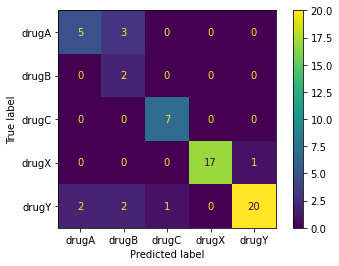

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

       drugA       0.71      0.62      0.67         8
       drugB       0.29      1.00      0.44         2
       drugC       0.88      1.00      0.93         7
       drugX       1.00      0.94      0.97        18
       drugY       0.95      0.80      0.87        25

    accuracy                           0.85        60
   macro avg       0.77      0.87      0.78        60
weighted avg       0.90      0.85      0.87        60



In [20]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predicted, average='weighted') 

0.8663400046008741

In [21]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_predicted))

Accuracy:  0.85
